<a href="https://colab.research.google.com/github/AISEN312/first-contributions/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math
from sklearn.preprocessing import LabelEncoder

In [4]:
file_path = '/content/tabular-lstm-evaluate-671d0c61cbaeaaff2919d4a6-data_preview.csv'
data = pd.read_csv(file_path)

In [14]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
             material name      synthesis method    types of defect  \
0            Rhodium Oxide          Hydrothermal  Holmium Vacancies   
1            Yttrium Oxide  Magnetron Sputtering     Zinc Vacancies   
2         Molybdenum Oxide  Magnetron Sputtering  Yttrium Vacancies   
3           Europium Oxide  Precipitation Method  Holmium Vacancies   
4  Cerium Oxide (Zr-doped)          Hydrothermal  Holmium Vacancies   

   band gap energy  defevt concentration  photolytic activity  
0              1.9                  0.27             1.000000  
1             95.8                  5.04             1.000000  
2             38.9                  4.29             1.000000  
3              1.9                  1.90             0.995386  
4             95.8                  5.04             1.000000  


In [5]:
data.fillna(method='ffill', inplace=True)

<ipython-input-5-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [6]:
for column in data.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [7]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])  # All features except the target
        y.append(data[i + time_steps, -1])  # Target variable (last column)
    return np.array(X), np.array(y)

In [9]:
time_steps = 10
X, y = create_sequences(data_scaled, time_steps)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1660 - val_loss: 0.0211
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0223 - val_loss: 0.0193
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0150 - val_loss: 0.0181
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0168 - val_loss: 0.0177
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0209 - val_loss: 0.0176
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - val_loss: 0.0175
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0178 - val_loss: 0.0175
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0161 - val_loss: 0.0175
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0147 - val_loss: 0.0172
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0162 - val_loss: 0.0173
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0151 - val_loss: 0.0181
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
y_pred = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [15]:
num_features = data.shape[1]

In [16]:
y_test_extended = np.zeros((len(y_test), num_features))
y_pred_extended = np.zeros((len(y_pred), num_features))

In [17]:
y_test_extended[:, -1] = y_test
y_pred_extended[:, -1] = y_pred.flatten()


In [18]:
y_test_rescaled = scaler.inverse_transform(y_test_extended)[:, -1]
y_pred_rescaled = scaler.inverse_transform(y_pred_extended)[:, -1]

In [19]:
rmse = math.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.0300


In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

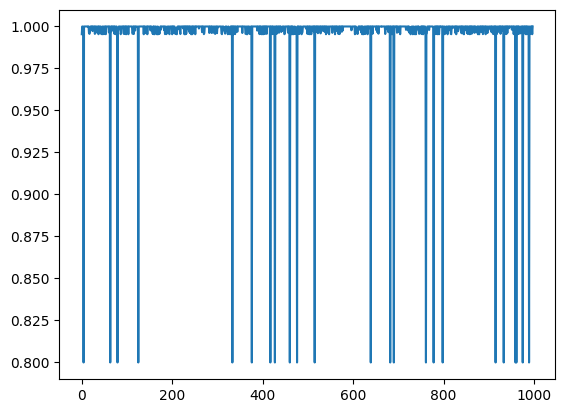

In [22]:
plt.plot(y_test_rescaled, label='Actual')


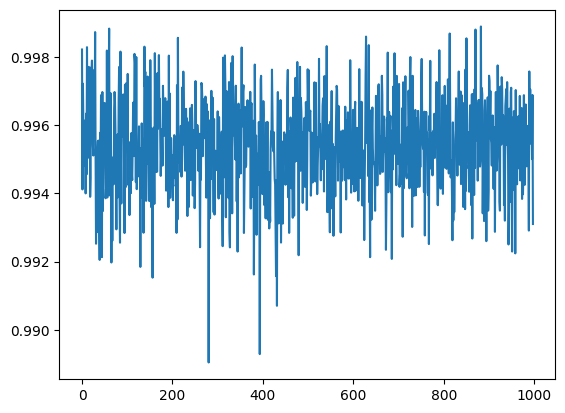

In [23]:
plt.plot(y_pred_rescaled, label='Predicted')

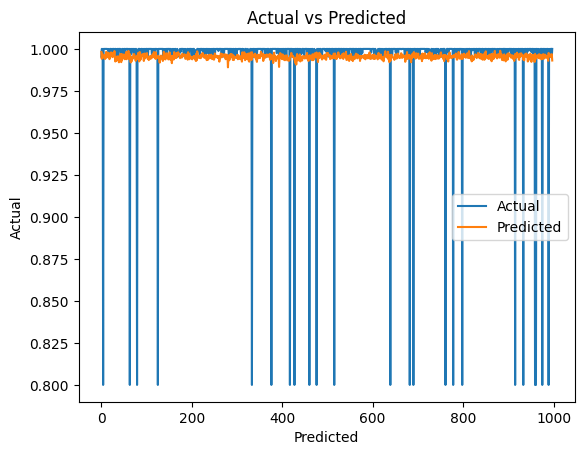

In [24]:
 # Make sure to import matplotlib.pyplot in the current cell

plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.show()